In [ ]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

# Importing AlexeyAB's Darknet Repo 

In order to train Yolo algorithm for your own custom dataset, the very first step is to install the darknet repo which is the original repository from which different yolo versions came out.

Darknet Repo - https://github.com/AlexeyAB/darknet

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15132, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 15132 (delta 26), reused 44 (delta 20), pack-reused 15073
Receiving objects: 100% (15132/15132), 13.47 MiB | 16.09 MiB/s, done.
Resolving deltas: 100% (10271/10271), done.


## OpenCV, GPU and CUDNN

By default, in the makefile of darknet repo, OpenCV, GPU and CUDNN is not used, but for training a Yolo algorithm for custom dataset without GPU it will approximately take 2-3 weeks continuous but with GPU and CUDNN which if not available as an hardware to you, Colab provides it free, will take few hours.

Take advantage of Colabs free GPU !

By making OpenCV, GPU and CUDNN as 1 in the makefile, the darknet would be made to be used with GPU and OpenCV.

In [ ]:
%cd darknet

# For making of darknet with Opencv and GPU as true ( if you have GPU enabled hardware )

!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

# For making of darknet with only Opencv as true ( if your hardware doesnt have GPU )

#!sed -i 's/OPENCV=0/OPENCV=1/' Makefile

/content/darknet


Check the Cuda version being used. If GPU is not enabled, it will give an error. To enable GPU: Go to Edit --> Go to Notebook Settings --> Choose GPU in hardware accelerator

In [ ]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


## Make the Darknet Repo

In [ ]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:935:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1136:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

Here, import the pretrained weights of your choosen yolo version from PJreddie's website - https://pjreddie.com/darknet/yolo/

yolov3.weights has already pretrained weights that can detect upto 80 classes, these weights are only used for detection purpose and nothing else. 

Here YOLOv3-416 is been used in this notebook as it has not a very large models as compared to other yolo versions as well as the fps on which it works is near 30 which is decent enough.


In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

def Show(path):

  image = cv2.imread(path)

  plot = plt.gcf()
  plot.set_size_inches(9, 5)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.show()

--2021-06-24 07:19:54--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  23.0MB/s    in 11s     

2021-06-24 07:20:05 (21.6 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



Here we use the traditional way of using darknet repo with already trained weights on a sample photo. To make yolov3 predict the image, use detect method followed by yolov3s configuration file cfg, which has all the required data about the classes used, to models being used to detect, and weights file which was imported earlier which would be used to predict. 


Also a Show method has been defined which will take the prediction path and plot the RGB image of the prediction with the bounding box/boxes.

In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights ../apple.jfif

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

To show the predictions made, this line of code is required 

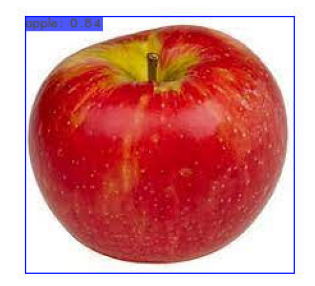

In [ ]:
Show('predictions.jpg')

# Preparing for Training !
## Mount your Google Drive

All the required files and training images which has to be used for training YOLO for custom dataset was stored in the Google Drive and so mounting of it is required. 

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

/content
Mounted at /content/gdrive


**Starting to Train Yolov3 Model with custom dataset** 

*Importing and Unziping the train images and annotations*


In [ ]:
!ls gdrive/MyDrive/Custom_Yolo

backup	obj.data  obj.names  obj.zip  train.txt  yolov3_custom.cfg


*Unzip the zip file containing all your images with their annotations to darknet/data/ folder. Obj folder will contain all the jpg and txt files as training dataset with labels and bounding box data.*

In [ ]:
%cd darknet
!unzip ../gdrive/MyDrive/Custom_Yolo/obj.zip -d data/

/content/darknet
Archive:  ../gdrive/MyDrive/Custom_Yolo/obj.zip
  inflating: data/obj/00038a568acc699b.jpg  
  inflating: data/obj/00038a568acc699b.txt  
  inflating: data/obj/00042880c9c2aaaf.jpg  
  inflating: data/obj/00042880c9c2aaaf.txt  
  inflating: data/obj/000db8328068a829.jpg  
  inflating: data/obj/000db8328068a829.txt  
  inflating: data/obj/000e15227e915196.jpg  
  inflating: data/obj/000e15227e915196.txt  
  inflating: data/obj/001104dcc402b037.jpg  
  inflating: data/obj/001104dcc402b037.txt  
  inflating: data/obj/001263d35122afde.jpg  
  inflating: data/obj/001263d35122afde.txt  
  inflating: data/obj/0012f1c145573ce2.jpg  
  inflating: data/obj/0012f1c145573ce2.txt  
  inflating: data/obj/0013040bccfb3c90.jpg  
  inflating: data/obj/0013040bccfb3c90.txt  
  inflating: data/obj/0015a40332faf225.jpg  
  inflating: data/obj/0015a40332faf225.txt  
  inflating: data/obj/0017506ee379bd12.jpg  
  inflating: data/obj/0017506ee379bd12.txt  
  inflating: data/obj/0024b02259695

*Copying custom configuration file for yolov3 from G-Drive (Assuming already made custom cfg file)*

After copying, the name of the file would still be yolov3.cfg

In [ ]:
!cp ../gdrive/MyDrive/Custom_Yolo/yolov3_custom.cfg cfg/yolov3.cfg

*Copying custom .data and .names file from G-Drive*

**Check https://github.com/Xploror/Object_Detection_YOLO/blob/main/README.md to know in detail how to make your own custom cfg, data and names file.**

In [ ]:
#%cd darknet
!cp ../gdrive/MyDrive/Custom_Yolo/obj.data data/
!cp ../gdrive/MyDrive/Custom_Yolo/obj.names data/

*Copying Train text file from G-Drive ( Contains path to all the train images )*

In [ ]:
!cp ../gdrive/MyDrive/Custom_Yolo/train.txt data/

*Downloading convolutional weights from pjreddie website as 74 file*

The format of these weights are required to train the YOLO model unlike yolov3.weights which are already trained and only usable for direct detection. 

**Do not get confused between darknet53.conv.74 and yolov3.weights, both contains weights for each layer of yolo but yolov3.weights can only have 80 predefined classes to detect whereas darknet53.conv.74 has initial weights used to train YOLO and can be used to train for any number of classes specified by your cfg, names and data file.**

In [ ]:
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2021-06-08 17:50:41--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2021-06-08 17:50:41--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  36.8MB/s    in 4.7s    

2021-06-08 17:50:46 (33.2 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



**Training The model**

Traditional way to custom train yolo model is to use detector method unlike detect method used for detection purpose we saw earlier.

**Note** - Unlike detection, for training we need to specify obj.data, copied yolov3.cfg file and darknet53.conv.74 file. Before coming this far make sure all these required files are already ready. Dont show flag makes sure that after ever iteration, output doesnt start showing the trend.  

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3.cfg darknet53.conv.74 -dont_show

*To Continuing training your model using the saved weights in the gdrive as backup*

In our obj.data file there is a backup address where your latest weights would be saved if suddenly training stops. This makes sure that you are not loosing the progress you made and can continue training from wherever you left.

**Latest weights would be saved in afile called yolov3_last.weights in the backup address.**

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3.cfg ../gdrive/MyDrive/Custom_Yolo/backup/yolov3_last.weights -dont_show 

Streaming output truncated to the last 5000 lines.
 total_bbox = 63791, rewritten_bbox = 0.217899 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.814226), count: 4, class_loss = 0.066905, iou_loss = 0.135381, total_loss = 0.202286 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.773230), count: 3, class_loss = 0.264721, iou_loss = 0.135534, total_loss = 0.400255 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.697537), count: 1, class_loss = 0.032039, iou_loss = 0.101279, total_loss = 0.133317 
 total_bbox = 63799, rewritten_bbox = 0.217872 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.000214, iou_loss = 0.000000, total_loss = 0.000214 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.674160), count: 5, class_loss = 0.653760, iou_loss = 0.397042, total_loss = 1.050802 
v3 (mse 

In [ ]:
Show('chart.png')

**Testing the trained model**

Note that for training purpose in the yolov3_custom.cfg file we changed batch=1 to batch=64 and subdivision=1 to subdivision=16 but now as our model is trained and we are going to use our own trained weights then we have to revert batch and subdivision values back to 1. This is done in the cell below.

In [ ]:
# Object detecting using the custom-trained weights 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3.cfg

%cd ..

/content/darknet/cfg
/content/darknet


## Testing our own trained weights for custom classes with custom dataset on a test photo

We will use detector method again within which we will use test command unlike using detect command as the detect command only works for default trained weights and default classes used by different yolo versions.

Again in the cell below witht he detector test command we will use our custom made obj.data and .cfg files and for the weights, we will use the latest weight given by training. Here we give a threshold based on detecting certain level of confidence on objects, here taken 25%.

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5,  

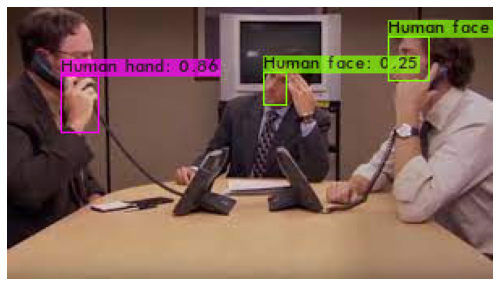

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3.cfg ../gdrive/MyDrive/Custom_Yolo/backup/yolov3_last.weights ../office.jfif -thresh 0.25 -dont_show
Show('predictions.jpg')

Wow ! It seems that our custom trained model works quite well on its job with fair enough confidence level. Well obviously we can use other yolo versions too, some might be more accurate to detect but may affect the fps if used on videos or live feed or may be computationally costly.

Here we used only two classes - 'Human Hand' and 'Human Face' but it can be used for any number of classes, the only thing is that dataset should have sufficient amount of training images as well as equal number of them for each class.